# Split Tests

In [1]:
from rascil.processing_components import create_visibility_from_ms
from visibilities import *
from images import *
import matplotlib.pyplot as plt
import matplotlib
import numpy
import helpers

plt.set_loglevel("critical")
cmap='turbo'
matplotlib.rcParams['figure.figsize'] = [10, 5]

## Original Databases

In [2]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[va] = create_visibility_from_ms('data/SGRA.ms')
[vb] = create_visibility_from_ms('data/SGRB.ms')
[vc] = create_visibility_from_ms('data/SGRC.ms')

cell_size = 0.00001849451

dirty_a, psf_a = dirty_psf_from_visibilities(va,cell_size,npix=512,weighting="uniform")
dirty_b, psf_b = dirty_psf_from_visibilities(vb,cell_size,npix=512,weighting="uniform")
dirty_c, psf_c = dirty_psf_from_visibilities(vc,cell_size,npix=512,weighting="uniform")

logging.getLogger().setLevel(logging.NOTSET)

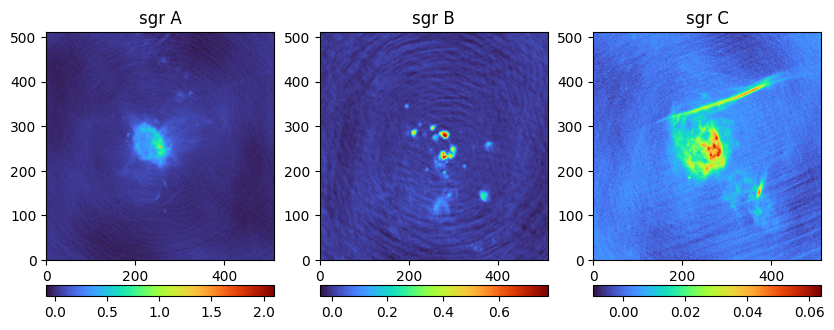

In [3]:
helpers.plotNImages([dirty_a.pixels.data[0,0,:,:], dirty_b.pixels.data[0,0,:,:], \
                     dirty_c.pixels.data[0,0,:,:]], ["sgr A", "sgr B", "sgr C"], cmap)

In [4]:
helpers.plotNImages([psf_a.pixels.data[0,0,:,:], psf_b.pixels.data[0,0,:,:], psf_c.pixels.data[0,0,:,:]], ["sgr A", "sgr B", "sgr C"], cmap)

## Cuts to visibilities

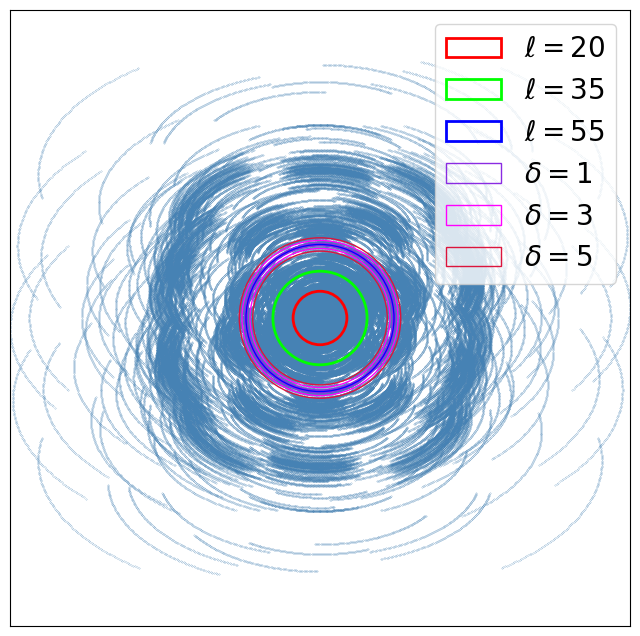

In [5]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

nrows,nbaselines, _ = va.uvw.shape
uv = va.visibility_acc.uvw_lambda[...,0:2]
uv = uv.reshape(nrows*nbaselines,2)

centers = [20, 35, 55]
center_cols = ["red", "lime", "blue"]

halfwidths = [1, 3, 5]
halfwidth_cols = ["blueviolet", "fuchsia", "crimson"]


#plt.title('Visibility cut centers')
max_xy = numpy.max([numpy.max(numpy.fabs(uv[:,0])), numpy.max(numpy.fabs(uv[:,1]))])
plt.scatter(uv[:,0],uv[:,1],c='steelblue',marker='.', s=0.1)
plt.scatter(-uv[:,0],-uv[:,1],c='steelblue',marker='.', s=0.1)
plt.xticks([])
plt.yticks([])
plt.xlim([-max_xy, max_xy])
plt.ylim([-max_xy, max_xy])
ax = plt.gca()

for i, center in enumerate(centers):
    center_lambda = center / (512 * cell_size)
    circ = plt.Circle((0, 0), center_lambda, edgecolor=center_cols[i], facecolor="none", lw=2, label="$\ell=" + str(center) + "$")
    ax.add_patch(circ)
    
center_lambda = 55 / (512 * cell_size)

for i, hw in enumerate(halfwidths):
    outer = (55 + hw) / (512 * cell_size)
    inner = (55 - hw) / (512 * cell_size)
    circ_outer = plt.Circle((0, 0), outer, edgecolor=halfwidth_cols[i], facecolor="none", lw=1, label="$\delta=" + str(hw) + "$")
    circ_inner = plt.Circle((0, 0), inner, edgecolor=halfwidth_cols[i], facecolor="none", lw=1)
    ax.add_patch(circ_outer)
    ax.add_patch(circ_inner)

plt.legend(loc="upper right", fontsize=20)
    
plt.savefig("figures/partition_centers.png", bbox_inches='tight')

## Different Halfwidths

In [6]:
halfwidths = [1, 3, 5]
halfwidth_cols = ["crimson", "fuchsia", "blueviolet"]

#plt.title('Visibility cut halfwidths')
plt.scatter(uv[:,0],uv[:,1],c='steelblue',marker='.', s=0.1)
plt.scatter(-uv[:,0],-uv[:,1],c='steelblue',marker='.', s=0.1)
plt.xticks([])
plt.yticks([])
plt.xlim([-max_xy, max_xy])
plt.ylim([-max_xy, max_xy])
ax = plt.gca()

center_lambda = 55 / (512 * cell_size)

for i, hw in enumerate(halfwidths):
    outer = (55 + hw) / (512 * cell_size)
    inner = (55 - hw) / (512 * cell_size)
    circ_outer = plt.Circle((0, 0), outer, edgecolor=halfwidth_cols[i], facecolor="none", lw=1, label="$\delta=" + str(hw) + "$")
    circ_inner = plt.Circle((0, 0), inner, edgecolor=halfwidth_cols[i], facecolor="none", lw=1)
    ax.add_patch(circ_outer)
    ax.add_patch(circ_inner)
    
plt.legend(loc="upper right", fontsize=20)

circ = plt.Circle((0, 0), center_lambda, edgecolor="black", facecolor="none", lw=1)
ax.add_patch(circ)
    
plt.savefig("figures/partition_halfwidths.png", bbox_inches='tight')

## Long and Small baseline databases

### Difference between halfwidths

In [30]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

matplotlib.rcParams['figure.figsize'] = [10, 5]

[va1l] = create_visibility_from_ms('data4/SGRA_long_baselines_19.ms')
[va1s] = create_visibility_from_ms('data4/SGRA_small_baselines_21.ms')
[va3l] = create_visibility_from_ms('data4/SGRA_long_baselines_17.ms')
[va3s] = create_visibility_from_ms('data4/SGRA_small_baselines_23.ms')
[va5l] = create_visibility_from_ms('data4/SGRA_long_baselines_15.ms')
[va5s] = create_visibility_from_ms('data4/SGRA_small_baselines_25.ms')

dirty_a1l, psf_a1l = dirty_psf_from_visibilities(va1l,cell_size,npix=512,weighting="uniform")
dirty_a1s, psf_a1s = dirty_psf_from_visibilities(va1s,cell_size,npix=512,weighting="uniform")
dirty_a3l, psf_a3l = dirty_psf_from_visibilities(va3l,cell_size,npix=512,weighting="uniform")
dirty_a3s, psf_a3s = dirty_psf_from_visibilities(va3s,cell_size,npix=512,weighting="uniform")
dirty_a5l, psf_a5l = dirty_psf_from_visibilities(va5l,cell_size,npix=512,weighting="uniform")
dirty_a5s, psf_a5s = dirty_psf_from_visibilities(va5s,cell_size,npix=512,weighting="uniform")

logging.getLogger().setLevel(logging.NOTSET)

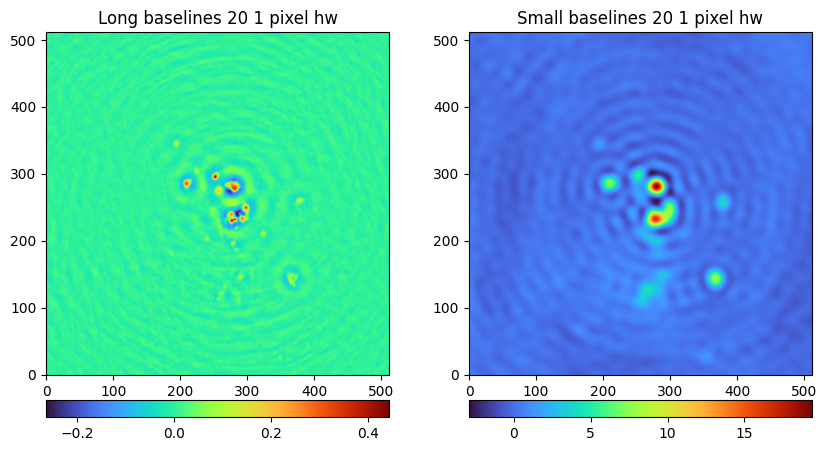

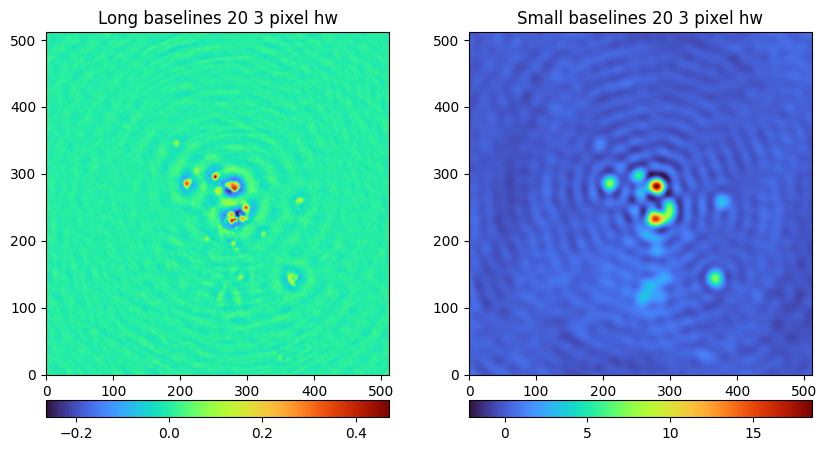

In [31]:
helpers.plotNImages([dirty_a1l.pixels.data[0,0,:,:], dirty_a1s.pixels.data[0,0,:,:]], \
                    ["Long baselines 20 1 pixel hw", "Small baselines 20 1 pixel hw"], cmap)
helpers.plotNImages([dirty_a3l.pixels.data[0,0,:,:], dirty_a3s.pixels.data[0,0,:,:]], \
                    ["Long baselines 20 3 pixel hw", "Small baselines 20 3 pixel hw"], cmap)
helpers.plotNImages([dirty_a5l.pixels.data[0,0,:,:], dirty_a5s.pixels.data[0,0,:,:]], \
                    ["Long baselines 20 5 pixel hw", "Small baselines 20 5 pixel hw"], cmap)

### Difference between cuts

#### sgr A

In [34]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[val1] = create_visibility_from_ms('data4/SGRA_long_baselines_15.ms')
[vas1] = create_visibility_from_ms('data4/SGRA_small_baselines_25.ms')
[val2] = create_visibility_from_ms('data4/SGRA_long_baselines_30.ms')
[vas2] = create_visibility_from_ms('data4/SGRA_small_baselines_40.ms')
[val3] = create_visibility_from_ms('data4/SGRA_long_baselines_50.ms')
[vas3] = create_visibility_from_ms('data4/SGRA_small_baselines_60.ms')

dirty_al1, psf_al1 = dirty_psf_from_visibilities(val1,cell_size,npix=512,weighting="uniform")
dirty_as1, psf_as1 = dirty_psf_from_visibilities(vas1,cell_size,npix=512,weighting="uniform")
dirty_al2, psf_al2 = dirty_psf_from_visibilities(val2,cell_size,npix=512,weighting="uniform")
dirty_as2, psf_as2 = dirty_psf_from_visibilities(vas2,cell_size,npix=512,weighting="uniform")
dirty_al3, psf_al3 = dirty_psf_from_visibilities(val3,cell_size,npix=512,weighting="uniform")
dirty_as3, psf_as3 = dirty_psf_from_visibilities(vas3,cell_size,npix=512,weighting="uniform")

helpers.write_nparr_to_fits(psf_as1.pixels.data[0, 0, :, :], "data/SGRA_low25_psf.fits")
helpers.write_nparr_to_fits(dirty_as1.pixels.data[0, 0, :, :], "data/SGRA_low25_dirty.fits")
helpers.write_nparr_to_fits(psf_as2.pixels.data[0, 0, :, :], "data/SGRA_low40_psf.fits")
helpers.write_nparr_to_fits(dirty_as2.pixels.data[0, 0, :, :], "data/SGRA_low40_dirty.fits")
helpers.write_nparr_to_fits(psf_as3.pixels.data[0, 0, :, :], "data/SGRA_low60_psf.fits")
helpers.write_nparr_to_fits(dirty_as3.pixels.data[0, 0, :, :], "data/SGRA_low60_dirty.fits")

helpers.write_nparr_to_fits(psf_al1.pixels.data[0, 0, :, :], "data/SGRA_high15_psf.fits")
helpers.write_nparr_to_fits(dirty_al1.pixels.data[0, 0, :, :], "data/SGRA_high15_dirty.fits")
helpers.write_nparr_to_fits(psf_al2.pixels.data[0, 0, :, :], "data/SGRA_high30_psf.fits")
helpers.write_nparr_to_fits(dirty_al2.pixels.data[0, 0, :, :], "data/SGRA_high30_dirty.fits")
helpers.write_nparr_to_fits(psf_al3.pixels.data[0, 0, :, :], "data/SGRA_high50_psf.fits")
helpers.write_nparr_to_fits(dirty_al3.pixels.data[0, 0, :, :], "data/SGRA_high50_dirty.fits")

logging.getLogger().setLevel(logging.NOTSET)

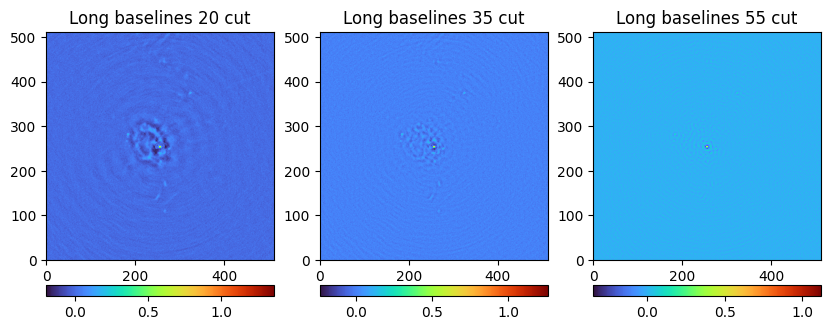

In [35]:
helpers.plotNImages([dirty_as1.pixels.data[0,0,:,:], dirty_as2.pixels.data[0,0,:,:], \
                     dirty_as3.pixels.data[0,0,:,:]], ["Small baselines 20 cut", "Small baselines 35 cut", \
                                                       "Small baselines 55 cut"], cmap)
helpers.plotNImages([dirty_al1.pixels.data[0,0,:,:], dirty_al2.pixels.data[0,0,:,:], \
                     dirty_al3.pixels.data[0,0,:,:]], ["Long baselines 20 cut", "Long baselines 35 cut", \
                                                       "Long baselines 55 cut"], cmap)

#### sgr B

In [11]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[val1] = create_visibility_from_ms('data4/SGRB_long_baselines_15.ms')
[vas1] = create_visibility_from_ms('data4/SGRB_small_baselines_25.ms')
[val2] = create_visibility_from_ms('data4/SGRB_long_baselines_30.ms')
[vas2] = create_visibility_from_ms('data4/SGRB_small_baselines_40.ms')
[val3] = create_visibility_from_ms('data4/SGRB_long_baselines_50.ms')
[vas3] = create_visibility_from_ms('data4/SGRB_small_baselines_60.ms')

dirty_al1, psf_al1 = dirty_psf_from_visibilities(val1,cell_size,npix=512,weighting="uniform")
dirty_as1, psf_as1 = dirty_psf_from_visibilities(vas1,cell_size,npix=512,weighting="uniform")
dirty_al2, psf_al2 = dirty_psf_from_visibilities(val2,cell_size,npix=512,weighting="uniform")
dirty_as2, psf_as2 = dirty_psf_from_visibilities(vas2,cell_size,npix=512,weighting="uniform")
dirty_al3, psf_al3 = dirty_psf_from_visibilities(val3,cell_size,npix=512,weighting="uniform")
dirty_as3, psf_as3 = dirty_psf_from_visibilities(vas3,cell_size,npix=512,weighting="uniform")

helpers.write_nparr_to_fits(psf_as1.pixels.data[0, 0, :, :], "data/SGRB_low25_psf.fits")
helpers.write_nparr_to_fits(dirty_as1.pixels.data[0, 0, :, :], "data/SGRB_low25_dirty.fits")
helpers.write_nparr_to_fits(psf_as2.pixels.data[0, 0, :, :], "data/SGRB_low40_psf.fits")
helpers.write_nparr_to_fits(dirty_as2.pixels.data[0, 0, :, :], "data/SGRB_low40_dirty.fits")
helpers.write_nparr_to_fits(psf_as3.pixels.data[0, 0, :, :], "data/SGRB_low60_psf.fits")
helpers.write_nparr_to_fits(dirty_as3.pixels.data[0, 0, :, :], "data/SGRB_low60_dirty.fits")

helpers.write_nparr_to_fits(psf_al1.pixels.data[0, 0, :, :], "data/SGRB_high15_psf.fits")
helpers.write_nparr_to_fits(dirty_al1.pixels.data[0, 0, :, :], "data/SGRB_high15_dirty.fits")
helpers.write_nparr_to_fits(psf_al2.pixels.data[0, 0, :, :], "data/SGRB_high30_psf.fits")
helpers.write_nparr_to_fits(dirty_al2.pixels.data[0, 0, :, :], "data/SGRB_high30_dirty.fits")
helpers.write_nparr_to_fits(psf_al3.pixels.data[0, 0, :, :], "data/SGRB_high50_psf.fits")
helpers.write_nparr_to_fits(dirty_al3.pixels.data[0, 0, :, :], "data/SGRB_high50_dirty.fits")


logging.getLogger().setLevel(logging.NOTSET)

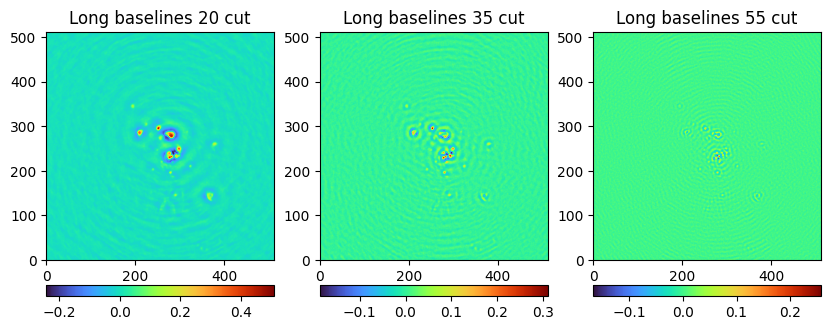

In [12]:
helpers.plotNImages([dirty_as1.pixels.data[0,0,:,:], dirty_as2.pixels.data[0,0,:,:], \
                     dirty_as3.pixels.data[0,0,:,:]], ["Small baselines 20 cut", "Small baselines 35 cut", \
                                                       "Small baselines 55 cut"], cmap)
helpers.plotNImages([dirty_al1.pixels.data[0,0,:,:], dirty_al2.pixels.data[0,0,:,:], \
                     dirty_al3.pixels.data[0,0,:,:]], ["Long baselines 20 cut", "Long baselines 35 cut", \
                                                       "Long baselines 55 cut"], cmap)

#### sgr C

In [13]:
%%capture

logging.getLogger().setLevel(logging.CRITICAL)

[val1] = create_visibility_from_ms('data4/SGRC_long_baselines_15.ms')
[vas1] = create_visibility_from_ms('data4/SGRC_small_baselines_25.ms')
[val2] = create_visibility_from_ms('data4/SGRC_long_baselines_30.ms')
[vas2] = create_visibility_from_ms('data4/SGRC_small_baselines_40.ms')
[val3] = create_visibility_from_ms('data4/SGRC_long_baselines_50.ms')
[vas3] = create_visibility_from_ms('data4/SGRC_small_baselines_60.ms')

dirty_al1, psf_al1 = dirty_psf_from_visibilities(val1,cell_size,npix=512,weighting="uniform")
dirty_as1, psf_as1 = dirty_psf_from_visibilities(vas1,cell_size,npix=512,weighting="uniform")
dirty_al2, psf_al2 = dirty_psf_from_visibilities(val2,cell_size,npix=512,weighting="uniform")
dirty_as2, psf_as2 = dirty_psf_from_visibilities(vas2,cell_size,npix=512,weighting="uniform")
dirty_al3, psf_al3 = dirty_psf_from_visibilities(val3,cell_size,npix=512,weighting="uniform")
dirty_as3, psf_as3 = dirty_psf_from_visibilities(vas3,cell_size,npix=512,weighting="uniform")

helpers.write_nparr_to_fits(psf_as1.pixels.data[0, 0, :, :], "data/SGRC_low25_psf.fits")
helpers.write_nparr_to_fits(dirty_as1.pixels.data[0, 0, :, :], "data/SGRC_low25_dirty.fits")
helpers.write_nparr_to_fits(psf_as2.pixels.data[0, 0, :, :], "data/SGRC_low40_psf.fits")
helpers.write_nparr_to_fits(dirty_as2.pixels.data[0, 0, :, :], "data/SGRC_low40_dirty.fits")
helpers.write_nparr_to_fits(psf_as3.pixels.data[0, 0, :, :], "data/SGRC_low60_psf.fits")
helpers.write_nparr_to_fits(dirty_as3.pixels.data[0, 0, :, :], "data/SGRC_low60_dirty.fits")

helpers.write_nparr_to_fits(psf_al1.pixels.data[0, 0, :, :], "data/SGRC_high15_psf.fits")
helpers.write_nparr_to_fits(dirty_al1.pixels.data[0, 0, :, :], "data/SGRC_high15_dirty.fits")
helpers.write_nparr_to_fits(psf_al2.pixels.data[0, 0, :, :], "data/SGRC_high30_psf.fits")
helpers.write_nparr_to_fits(dirty_al2.pixels.data[0, 0, :, :], "data/SGRC_high30_dirty.fits")
helpers.write_nparr_to_fits(psf_al3.pixels.data[0, 0, :, :], "data/SGRC_high50_psf.fits")
helpers.write_nparr_to_fits(dirty_al3.pixels.data[0, 0, :, :], "data/SGRC_high50_dirty.fits")

logging.getLogger().setLevel(logging.NOTSET)

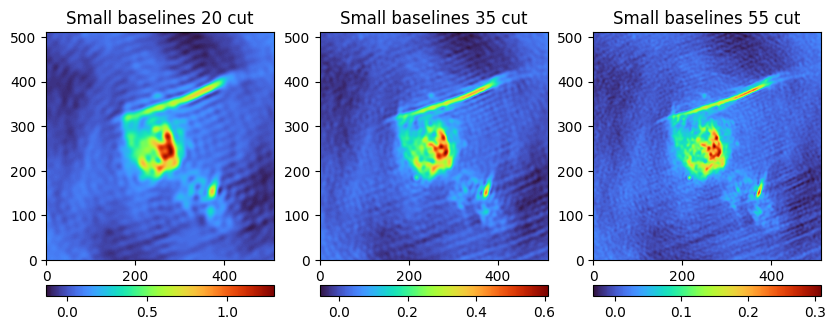

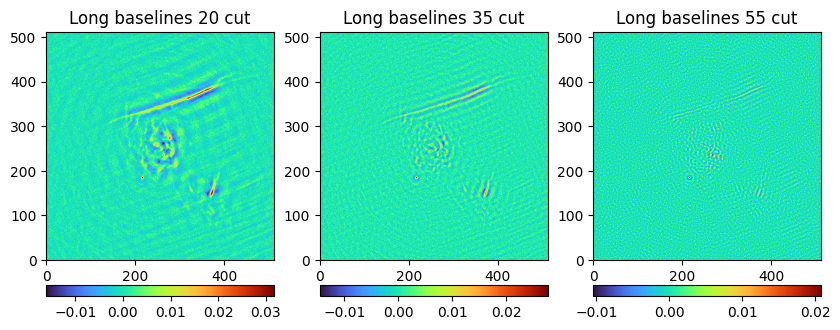

In [14]:
helpers.plotNImages([dirty_as1.pixels.data[0,0,:,:], dirty_as2.pixels.data[0,0,:,:], \
                     dirty_as3.pixels.data[0,0,:,:]], ["Small baselines 20 cut", "Small baselines 35 cut", \
                                                       "Small baselines 55 cut"], cmap)
helpers.plotNImages([dirty_al1.pixels.data[0,0,:,:], dirty_al2.pixels.data[0,0,:,:], \
                     dirty_al3.pixels.data[0,0,:,:]], ["Long baselines 20 cut", "Long baselines 35 cut", \
                                                       "Long baselines 55 cut"], cmap)

## Simulations for construction accuracy across different cuts

In [5]:
gts = [helpers.readFits("data/SGRA_full_gt.fits"), helpers.readFits("data/SGRB_full_gt.fits"), \
       helpers.readFits("data/SGRC_full_gt.fits")]

cuts = [20, 35, 55]
hws = [5, 3, 1]
dataset_names = ["Sgr A", "Sgr B2", "Sgr C"]
actual_names = ["SGRA", "SGRB", "SGRC"]

data = []

for i, dataset in enumerate(actual_names):
    curr_data = [dataset]
    for cut in cuts:
        for hw in hws:
            filename = "results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/high/" + \
                dataset + "_long_baselines_" + str(cut - hw) + "_nmoment4_cip_deconvolved.fits"
            recon = helpers.readFits(filename)
            psnr = helpers.compute_snr(gts[i], recon)
            curr_data.append(psnr)
            
    data.append(curr_data)

In [6]:
import pandas as pd

pd.DataFrame(data, columns=["Dataset", "$\ell=20$, $\delta=5$", "$\ell=20$, $\delta=3$", "$\ell=20$, $\delta=1$", \
        "$\ell=35$, $\delta=5$", "$\ell=35$, $\delta=3$", "$\ell=35$, $\delta=1$", \
        "$\ell=55$, $\delta=5$", "$\ell=55$, $\delta=3$", "$\ell=55$, $\delta=1$"])

Dataset  $\ell=20$, $\delta=5$  $\ell=20$, $\delta=3$  \
0    SGRA              21.670692              22.753876   
1    SGRB              20.829469              21.119095   
2    SGRC              18.322895              19.201803   

   $\ell=20$, $\delta=1$  $\ell=35$, $\delta=5$  $\ell=35$, $\delta=3$  \
0              22.561959              21.473485              22.106303   
1              20.540620              21.259138              21.788510   
2              19.001583              19.143617              19.668364   

   $\ell=35$, $\delta=1$  $\ell=55$, $\delta=5$  $\ell=55$, $\delta=3$  \
0              22.543727              21.959502              21.657455   
1              22.096380              23.146888              22.765652   
2              19.712512              19.165491              18.818663   

   $\ell=55$, $\delta=1$  
0              21.494363  
1              22.614004  
2              18.627881

### Test to check how much estimating $\sigma^2$ and $\eta^2$ impacts PSNR

## Evaluation of PSNRs across the major cycles for both Low and Multistep

In [7]:
gts_multistep = [helpers.readFits("data/SGRA_full_gt.fits"), helpers.readFits("data/SGRB_full_gt.fits"), \
       helpers.readFits("data/SGRC_full_gt.fits")]

gts_low = [[[helpers.readFits("data/SGRA_low25_gt.fits"), helpers.readFits("data/SGRA_low23_gt.fits"), helpers.readFits("data/SGRA_low21_gt.fits")], \
            [helpers.readFits("data/SGRA_low40_gt.fits"), helpers.readFits("data/SGRA_low38_gt.fits"), helpers.readFits("data/SGRA_low36_gt.fits")], \
            [helpers.readFits("data/SGRA_low60_gt.fits"), helpers.readFits("data/SGRA_low58_gt.fits"), helpers.readFits("data/SGRA_low56_gt.fits")]], \
            [[helpers.readFits("data/SGRB_low25_gt.fits"), helpers.readFits("data/SGRB_low23_gt.fits"), helpers.readFits("data/SGRB_low21_gt.fits")], \
            [helpers.readFits("data/SGRB_low40_gt.fits"), helpers.readFits("data/SGRB_low38_gt.fits"), helpers.readFits("data/SGRB_low36_gt.fits")], \
            [helpers.readFits("data/SGRB_low60_gt.fits"), helpers.readFits("data/SGRB_low58_gt.fits"), helpers.readFits("data/SGRB_low56_gt.fits")]], \
            [[helpers.readFits("data/SGRC_low25_gt.fits"), helpers.readFits("data/SGRC_low23_gt.fits"), helpers.readFits("data/SGRC_low21_gt.fits")], \
            [helpers.readFits("data/SGRC_low40_gt.fits"), helpers.readFits("data/SGRC_low38_gt.fits"), helpers.readFits("data/SGRC_low36_gt.fits")], \
            [helpers.readFits("data/SGRC_low60_gt.fits"), helpers.readFits("data/SGRC_low58_gt.fits"), helpers.readFits("data/SGRC_low56_gt.fits")]]]

cuts = [20, 35, 55]
hws = [5, 3, 1]
dataset_names = ["Sgr A", "Sgr B2", "Sgr C"]
actual_names = ["SGRA", "SGRB", "SGRC"]

data_low = []
data_high = []

for i, dataset in enumerate(actual_names):
    high_gt = gts_multistep[i]
    for j, cut in enumerate(cuts):
        for k, hw in enumerate(hws):
            curr_data_low = [dataset + " " + str(cut) + " " + str(hw)]
            curr_data_high = [dataset + " " + str(cut) + " " + str(hw)]
            
            low_gt = gts_low[i][j][k]
            
            curr_deconv_low = None
            curr_deconv_high = None
            for maj_iter in range(0, 5):
                high_filename = "results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/high/" + \
                    "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
                low_filename = "results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/low/" + \
                    "deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
                deconv_low = helpers.readFits(low_filename)
                deconv_high = helpers.readFits(high_filename)
                
                if curr_deconv_low is None:
                    curr_deconv_low = deconv_low
                else:
                    curr_deconv_low += deconv_low
                
                if curr_deconv_high is None:
                    curr_deconv_high = deconv_high
                else:
                    curr_deconv_high += deconv_high
                
                psnr_low = helpers.compute_snr(low_gt, curr_deconv_low)
                psnr_high = helpers.compute_snr(high_gt, curr_deconv_high)
                curr_data_low.append(psnr_low)
                curr_data_high.append(psnr_high)
            
            data_low.append(curr_data_low)
            data_high.append(curr_data_high)

### Low

In [8]:
pd.DataFrame(data_low, columns=["Dataset", "1", "2", "3", "4", "5"])

Dataset          1          2          3          4          5
0   SGRA 20 5  15.737383  21.652870  24.249003  25.559406  25.866440
1   SGRA 20 3  15.644386  21.299643  24.731900  27.268875  29.151940
2   SGRA 20 1  15.785018  21.623775  24.976671  27.290549  28.738231
3   SGRA 35 5  15.496068  20.854497  22.827921  24.077457  24.378475
4   SGRA 35 3  15.778110  21.404111  23.886622  25.499688  26.191484
5   SGRA 35 1  15.830700  21.618453  24.748810  26.969884  28.333287
6   SGRA 55 5  15.819042  21.574336  24.186597  25.821309  26.551532
7   SGRA 55 3  15.580497  21.161513  23.519022  25.125534  25.812199
8   SGRA 55 1  15.817394  21.456839  23.734403  25.220179  25.852200
9   SGRB 20 5  14.360773  18.803219  20.054828  20.008105  20.891195
10  SGRB 20 3  14.283794  18.663597  20.540127  20.091654  19.555963
11  SGRB 20 1  14.506927  19.166306  21.090502  21.794336  22.208029
12  SGRB 35 5  14.403671  19.328120  21.590490  22.830476  23.155990
13  SGRB 35 3  14.550870  19.447316  21.904671  23.442151  24.200712
14  SGRB 35 1  14.535457  19.535739  22.008161  23.617731  25.002854
15  SGRB 55 5  15.016111  20.655347  23.221796  24.549147  25.289782
16  SGRB 55 3  14.937646  20.437253  22.827762  24.070783  24.721901
17  SGRB 55 1  14.977502  20.478492  22.884434  23.985078  24.627913
18  SGRC 20 5  12.139443  16.867663  18.978796  20.219935  20.849672
19  SGRC 20 3  11.849876  16.274632  18.946691  20.622454  21.761579
20  SGRC 20 1  12.076238  16.681449  19.369483  21.022392  22.056095
21  SGRC 35 5  11.897762  16.383570  18.887335  20.784183  21.632857
22  SGRC 35 3  12.020597  16.600280  19.339072  21.573478  23.085030
23  SGRC 35 1  11.934713  16.371819  19.085005  21.409641  23.442869
24  SGRC 55 5  12.171613  16.831359  19.348019  20.994327  22.127381
25  SGRC 55 3  12.036388  16.667403  19.065269  20.691254  21.670811
26  SGRC 55 1  12.226170  16.918813  19.290320  20.845911  21.704129

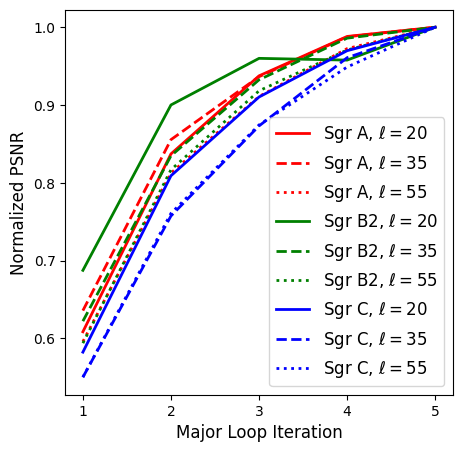

In [9]:
matplotlib.rcParams['figure.figsize'] = [5, 5]
from functools import partial

colours = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
styles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
labels = ["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$", \
         "Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$", \
         "Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]

for i, data in enumerate(data_low[::3]):
    cleaned_data = data[1:]
    norm_factor = numpy.max(cleaned_data)
    cleaned_data = [x / norm_factor for x in cleaned_data]

    plt.plot(range(1, 6), cleaned_data, c=colours[i], linestyle=styles[i], label=labels[i], lw=2)

plt.xticks([1,2,3,4,5])
    
plt.legend(loc="lower right", fontsize=12)
#plt.yscale('function', functions=(partial(numpy.power, 2.0), partial(numpy.emath.logn, 2.0)))
    
plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("Normalized PSNR", fontsize=12)
plt.savefig("figures/low_majcycle_conv.png", bbox_inches='tight')

### Multistep

In [10]:
pd.DataFrame(data_high, columns=["Dataset", "1", "2", "3", "4", "5"])

Dataset          1          2          3          4          5
0   SGRA 20 5  21.601685  21.670692  21.670692  21.670692  21.670692
1   SGRA 20 3  22.688608  22.753876  22.753876  22.753876  22.753876
2   SGRA 20 1  22.513225  22.561959  22.561959  22.561959  22.561959
3   SGRA 35 5  21.464210  21.473485  21.473485  21.473485  21.473485
4   SGRA 35 3  22.097513  22.106303  22.106303  22.106303  22.106303
5   SGRA 35 1  22.536361  22.543727  22.543727  22.543727  22.543727
6   SGRA 55 5  21.959902  21.959502  21.959502  21.959502  21.959502
7   SGRA 55 3  21.658225  21.657455  21.657455  21.657455  21.657455
8   SGRA 55 1  21.495906  21.494363  21.494363  21.494363  21.494363
9   SGRB 20 5  18.373552  20.828674  20.829469  20.829469  20.829469
10  SGRB 20 3  18.800172  21.118930  21.119095  21.119095  21.119095
11  SGRB 20 1  18.573952  20.540511  20.540620  20.540620  20.540620
12  SGRB 35 5  20.543755  21.259138  21.259138  21.259138  21.259138
13  SGRB 35 3  21.134616  21.788510  21.788510  21.788510  21.788510
14  SGRB 35 1  21.530813  22.096380  22.096380  22.096380  22.096380
15  SGRB 55 5  23.059326  23.146888  23.146888  23.146888  23.146888
16  SGRB 55 3  22.699432  22.765652  22.765652  22.765652  22.765652
17  SGRB 55 1  22.565303  22.614004  22.614004  22.614004  22.614004
18  SGRC 20 5  17.988510  18.322895  18.322895  18.322895  18.322895
19  SGRC 20 3  18.799910  19.201803  19.201803  19.201803  19.201803
20  SGRC 20 1  18.633099  19.001583  19.001583  19.001583  19.001583
21  SGRC 35 5  19.125136  19.143617  19.143617  19.143617  19.143617
22  SGRC 35 3  19.652593  19.668364  19.668364  19.668364  19.668364
23  SGRC 35 1  19.702392  19.712512  19.712512  19.712512  19.712512
24  SGRC 55 5  19.166625  19.165491  19.165491  19.165491  19.165491
25  SGRC 55 3  18.819500  18.818663  18.818663  18.818663  18.818663
26  SGRC 55 1  18.629465  18.627881  18.627881  18.627881  18.627881

In [18]:
colours = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']
styles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
labels = ["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$", \
         "Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$", \
         "Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]

for i, data in enumerate(data_high[::3]):
    cleaned_data = data[1:]
    norm_factor = numpy.max(cleaned_data)
    cleaned_data = [x / norm_factor for x in cleaned_data]
    print(cleaned_data)
    
    plt.plot(range(1, 6), cleaned_data, c=colours[i], linestyle=styles[i], label=labels[i], lw=2)


    
plt.legend(loc="lower right", fontsize=12)
plt.xticks([1,2,3,4,5])
plt.yscale('function', functions=(partial(numpy.power, 100.0), partial(numpy.emath.logn, 100.0)))
#plt.ylim([0.001, 1.05])

plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("Normalized PSNR", fontsize=12)
plt.savefig("figures/high_majcycle_conv.png", bbox_inches='tight')

[0.9968156460425884, 1.0, 1.0, 1.0, 1.0]
[0.999568067191531, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.9999818097515704, 0.9999818097515704, 0.9999818097515704, 0.9999818097515704]
[0.8820941411042466, 0.9999618732304603, 1.0, 1.0, 1.0]
[0.9663494182262208, 1.0, 1.0, 1.0, 1.0]
[0.9962171353383186, 1.0, 1.0, 1.0, 1.0]
[0.9817503948927412, 1.0, 1.0, 1.0, 1.0]
[0.9990346215632833, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.9999408416729082, 0.9999408416729082, 0.9999408416729082, 0.9999408416729082]


## Evaluation of convergence within FISTA for low and high

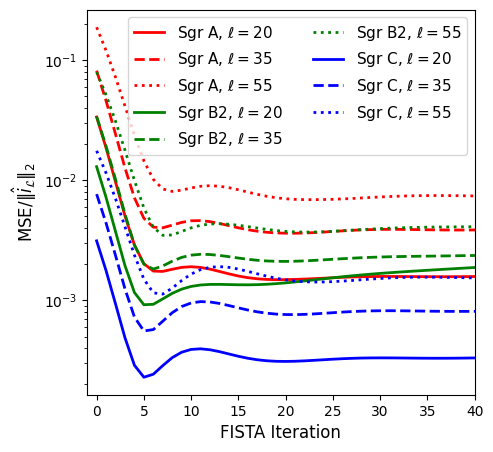

In [19]:
cuts = [20, 35, 55]
actual_names = ["SGRA", "SGRB", "SGRC"]

colours = ['r', 'g', 'b']
lstyles = ['-', '--', ':']
labels = [["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$"], \
         ["Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$"], \
         ["Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]]

for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        dirty = helpers.readFits("data/" + dataset + "_low" + str(cut + 5) + "_dirty.fits")
        dirty_norm = numpy.linalg.norm(dirty.flatten())
        
        csv_name = "results/cut_results/fista_convergence/" + dataset + "_low" + str(cut + 5) + ".csv"
        data = helpers.read_csv(csv_name)
        data = data[1:]
        data = [float(x) for x in data]
        #max_dat = numpy.max(data)
        data = [x / dirty_norm for x in data]
        
        plt.plot(range(0, len(data)), data, c=colours[i], linestyle=styles[j], label=labels[i][j], lw=2)

plt.xlim([-1, 40])
plt.legend(loc="upper right", fontsize=11, ncol=2)
plt.yscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("MSE/$\|\hat{i}_\mathcal{L}\|_2$", fontsize=12)
plt.savefig("figures/low_fista_conv.png", bbox_inches='tight')
        

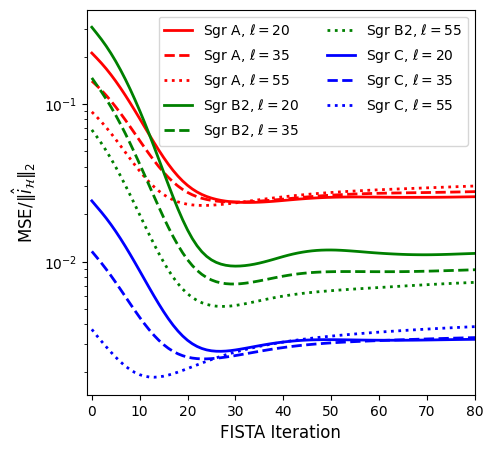

In [20]:
cuts = [20, 35, 55]
actual_names = ["SGRA", "SGRB", "SGRC"]

colours = ['r', 'g', 'b']
lstyles = ['-', '--', ':']
labels = [["Sgr A, $\ell=20$", "Sgr A, $\ell=35$", "Sgr A, $\ell=55$"], \
         ["Sgr B2, $\ell=20$", "Sgr B2, $\ell=35$", "Sgr B2, $\ell=55$"], \
         ["Sgr C, $\ell=20$", "Sgr C, $\ell=35$", "Sgr C, $\ell=55$"]]

for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        csv_name = "results/cut_results/fista_convergence/" + dataset + "_high" + str(cut + 5) + ".csv"
        dirty = helpers.readFits("data/" + dataset + "_high" + str(cut - 5) + "_dirty.fits")
        dirty_norm = numpy.linalg.norm(dirty.flatten())
        data = helpers.read_csv(csv_name)
        data = data[1:]
        data = [float(x) for x in data]
        #max_dat = numpy.max(data)
        data = [x / dirty_norm for x in data]
        
        plt.plot(range(0, len(data)), data, c=colours[i], linestyle=styles[j], label=labels[i][j], lw=2)

plt.xlim([-1, 80])
plt.legend(loc="upper right", fontsize=10, ncol=2)
plt.yscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("MSE/$\|\hat{i}_\mathcal{H}\|_2$", fontsize=12)
plt.savefig("figures/high_fista_conv.png", bbox_inches='tight')
        

### Example residuals

## Comparison against full reconstruction

### Accuracy of final full constructions

In [24]:
sgra_gt = helpers.readFits("data/SGRA_full_gt.fits")
sgrb_gt = helpers.readFits("data/SGRB_full_gt.fits")
sgrc_gt = helpers.readFits("data/SGRC_full_gt.fits")

sgra_deconv = helpers.readFits("results/cut_results/full_recons/SGRA/SGRA_nmoment4_cip_deconvolved.fits")
sgrb_deconv = helpers.readFits("results/cut_results/full_recons/SGRB/SGRB_nmoment4_cip_deconvolved.fits")
sgrc_deconv = helpers.readFits("results/cut_results/full_recons/SGRC/SGRC_nmoment4_cip_deconvolved.fits")

sgra_snr = helpers.compute_snr(sgra_gt, sgra_deconv)
sgrb_snr = helpers.compute_snr(sgrb_gt, sgrb_deconv)
sgrc_snr = helpers.compute_snr(sgrc_gt, sgrc_deconv)

17.921132202802188
20.84756194812263
15.544001013360113
21.47348509109923
21.259137723596826
19.14361681213756


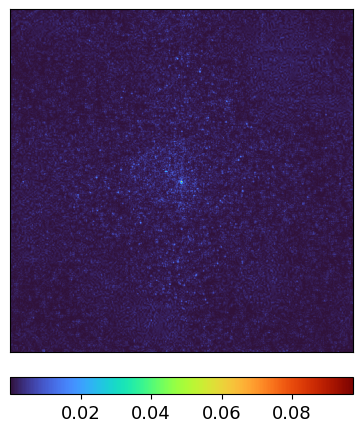

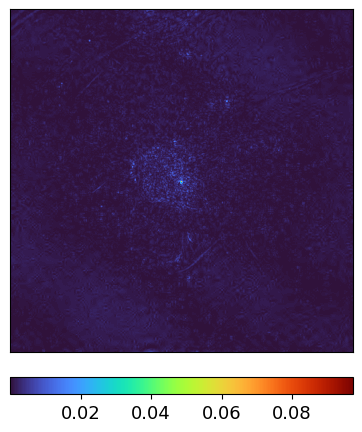

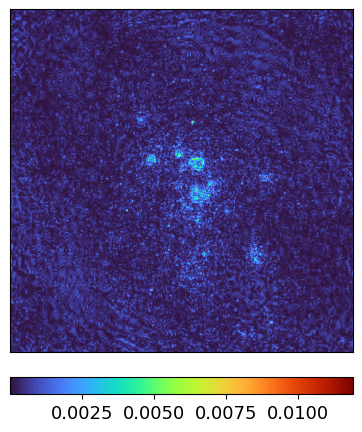

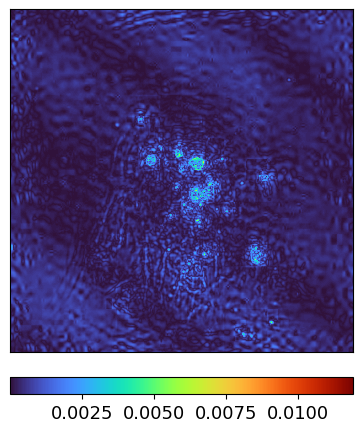

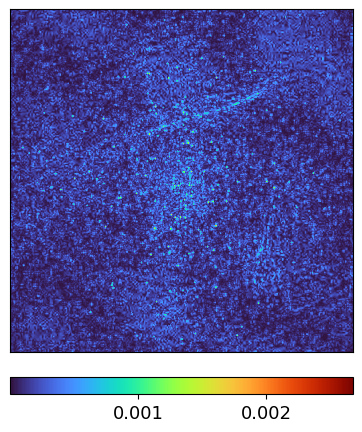

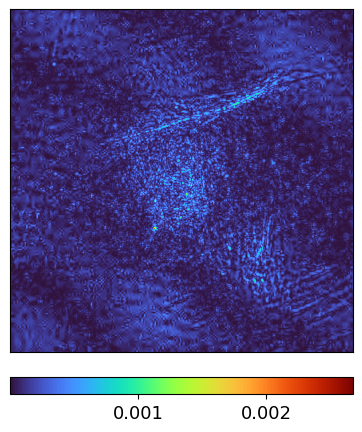

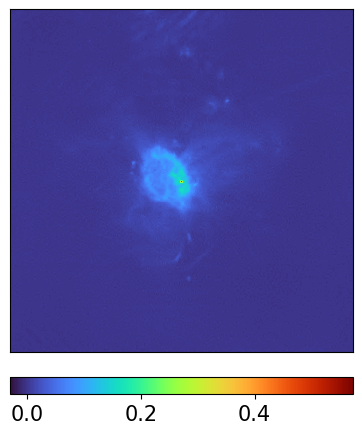

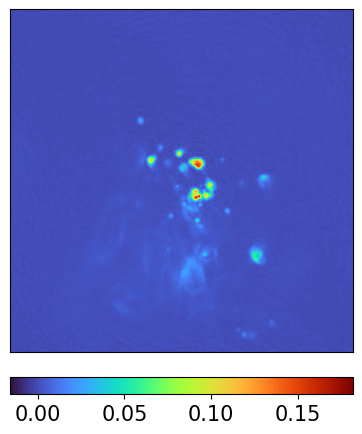

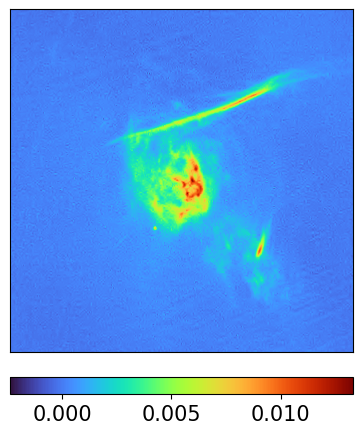

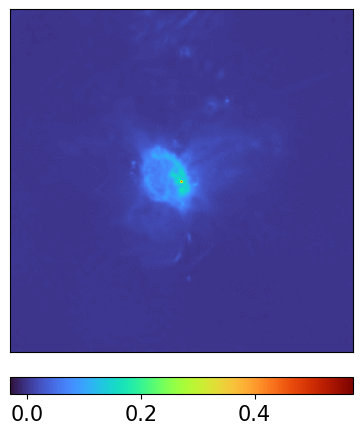

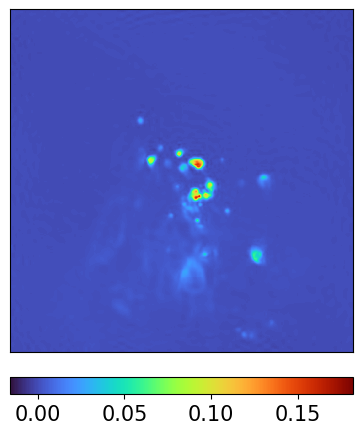

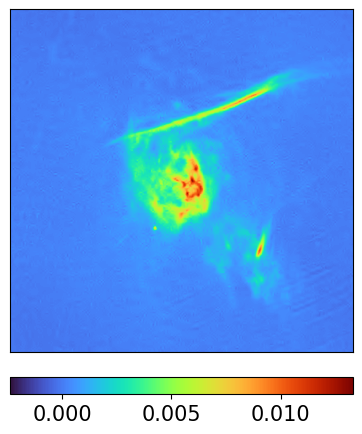

In [25]:
sgra_gt = helpers.readFits("data/SGRA_full_gt.fits")
sgrb_gt = helpers.readFits("data/SGRB_full_gt.fits")
sgrc_gt = helpers.readFits("data/SGRC_full_gt.fits")

sgra_deconv = helpers.readFits("results/cut_results/full_recons/SGRA/SGRA_nmoment4_cip_deconvolved.fits")
sgrb_deconv = helpers.readFits("results/cut_results/full_recons/SGRB/SGRB_nmoment4_cip_deconvolved.fits")
sgrc_deconv = helpers.readFits("results/cut_results/full_recons/SGRC/SGRC_nmoment4_cip_deconvolved.fits")

sgra_mstep_deconv = helpers.readFits("results/cut_results/SGRA/35/5hw/high/SGRA_long_baselines_30_nmoment4_cip_deconvolved.fits")
sgrb_mstep_deconv = helpers.readFits("results/cut_results/SGRB/35/5hw/high/SGRB_long_baselines_30_nmoment4_cip_deconvolved.fits")
sgrc_mstep_deconv = helpers.readFits("results/cut_results/SGRC/35/5hw/high/SGRC_long_baselines_30_nmoment4_cip_deconvolved.fits")

sgrams_snr = helpers.compute_snr(sgra_gt, sgra_mstep_deconv)
sgrbms_snr = helpers.compute_snr(sgrb_gt, sgrb_mstep_deconv)
sgrcms_snr = helpers.compute_snr(sgrc_gt, sgrc_mstep_deconv)

adif = numpy.abs(sgra_gt - sgra_deconv)
amsdif = numpy.abs(sgra_gt - sgra_mstep_deconv)
bdif = numpy.abs(sgrb_gt - sgrb_deconv)
bmsdif = numpy.abs(sgrb_gt - sgrb_mstep_deconv)
cdif = numpy.abs(sgrc_gt - sgrc_deconv)
cmsdif = numpy.abs(sgrc_gt - sgrc_mstep_deconv)

helpers.plotNImages([adif], [""], cmap, output_file="figures/full_sgra_abserr.png", same_scale=True, additional_scale_imgs=[amsdif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([amsdif], [""], cmap, output_file="figures/mstep_sgra_abserr.png", same_scale=True, additional_scale_imgs=[adif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([bdif], [""], cmap, output_file="figures/full_sgrb_abserr.png", same_scale=True, additional_scale_imgs=[bmsdif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([bmsdif], [""], cmap, output_file="figures/mstep_sgrb_abserr.png", same_scale=True, additional_scale_imgs=[bdif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([cdif], [""], cmap, output_file="figures/full_sgrc_abserr.png", same_scale=True, additional_scale_imgs=[cmsdif], hide_ticks=True, cbar_labelsize=13)
helpers.plotNImages([cmsdif], [""], cmap, output_file="figures/mstep_sgrc_abserr.png", same_scale=True, additional_scale_imgs=[cdif], hide_ticks=True, cbar_labelsize=13)

print(sgra_snr)
helpers.plotNImages([sgra_deconv], [""], cmap, output_file="figures/full_sgra.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgra_mstep_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrb_snr)
helpers.plotNImages([sgrb_deconv], [""], cmap, output_file="figures/full_sgrb.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrb_mstep_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrc_snr)
helpers.plotNImages([sgrc_deconv], [""], cmap, output_file="figures/full_sgrc.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrc_mstep_deconv], cbar_labelsize=15)

print(sgrams_snr)
helpers.plotNImages([sgra_mstep_deconv], [""], cmap, output_file="figures/mstep_sgra.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgra_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrbms_snr)
helpers.plotNImages([sgrb_mstep_deconv], [""], cmap, output_file="figures/mstep_sgrb.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrb_deconv], cbar_labelsize=15, vpadding=0.01)

print(sgrcms_snr)
helpers.plotNImages([sgrc_mstep_deconv], [""], cmap, output_file="figures/mstep_sgrc.png", hide_ticks=True, same_scale=True, additional_scale_imgs=[sgrc_deconv], cbar_labelsize=15)

In [26]:
colours = ['r', 'g', 'b']
datasets = ["Sgr A", "Sgr B2", "Sgr C"]
actual_datasets = ["SGRA", "SGRB", "SGRC"]
gts = [helpers.readFits("data/SGRA_full_gt.fits"), helpers.readFits("data/SGRB_full_gt.fits"), \
       helpers.readFits("data/SGRC_full_gt.fits")]

data = []

for i, dataset in enumerate(actual_datasets):
    gt = gts[i]
    curr_data = []
    curr_deconv = None
    for maj_iter in range(0, 5):
        filename = "results/cut_results/full_recons/" + dataset + "/deconv_iteration_" + str(maj_iter) + "_channel_0.fits"
        deconv = helpers.readFits(filename)

        if curr_deconv is None:
            curr_deconv = deconv
        else:
            curr_deconv += deconv

        psnr = helpers.compute_snr(gt, curr_deconv)
        curr_data.append(psnr)

    data.append(curr_data)

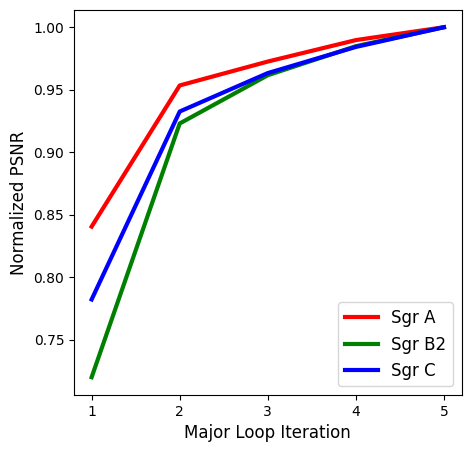

In [27]:
for i, dataset in enumerate(datasets):
    curr_data = data[i]
    norm_factor = numpy.max(curr_data)
    cleaned_data = [x / norm_factor for x in curr_data]
    
    plt.plot(range(1, 6), cleaned_data, c=colours[i], label=dataset, lw=3)

plt.legend(loc="lower right", fontsize=12)
plt.xticks([1,2,3,4,5])
    
plt.xlabel("Major Loop Iteration", fontsize=12)
plt.ylabel("Normalized PSNR", fontsize=12)
plt.savefig("figures/full_majcycle_conv.png", bbox_inches='tight')

In [28]:
actual_names = ["SGRA", "SGRB", "SGRC"]

for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("data/" + dataset + "_full_gt.fits")
    dirty = helpers.readFits("data/" + dataset + "_full_dirty.fits")
    psf = helpers.readFits("data/" + dataset + "_full_psf.fits")

    tmp_dirty_fn = "tmp_dirty.fits"
    tmp_psf_fn = "tmp_psf.fits"
    tmp_gt_fn = "tmp_gt.fits"

    csv_output_name = "results/cut_results/fista_convergence/" + dataset + "_full.csv"

    helpers.write_nparr_to_fits(dirty, tmp_dirty_fn)
    helpers.write_nparr_to_fits(psf, tmp_psf_fn)
    helpers.write_nparr_to_fits(gt, tmp_gt_fn)

    curr_lambda = 0.05 * numpy.linalg.norm(dirty.flatten())

    curr_output_name = "tmp_output.fits"

    os.system("julia julia_rascil_scripts/make_fullres_mse.jl " + str(curr_lambda) + " " + tmp_psf_fn + \
          " " + tmp_dirty_fn + " " + tmp_gt_fn + " 0 " + curr_output_name + " " + csv_output_name)

In [29]:
actual_names = ["SGRA", "SGRB", "SGRC"]

colours = ['r', 'g', 'b']
labels = ["Sgr A", "Sgr B2", "Sgr C"]

for i, dataset in enumerate(actual_names):
    csv_name = "results/cut_results/fista_convergence/" + dataset + "_full.csv"
    dirty = helpers.readFits("data/" + dataset + "_full_dirty.fits")
    dirty_norm = numpy.linalg.norm(dirty.flatten())
    data = helpers.read_csv(csv_name)
    data = data[1:]
    data = [float(x) for x in data]
    data = [x / dirty_norm for x in data]

    plt.plot(range(0, len(data)), data, c=colours[i], label=labels[i], lw=3)

plt.xlim([-1, 20])
plt.legend(loc="upper right", fontsize=12)
plt.yscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("MSE/$\|\hat{i}\|_2$", fontsize=12)
plt.savefig("figures/full_fista_conv.png", bbox_inches='tight')
        